In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import sys

In [18]:
# Import data
df = pd.read_excel("raw_data.xlsx")

In [19]:
df.tail()

,Campus Community Notified,Date SMU was Notified of Positive Test,Last Known Date on Campus,Description,Active,Student,OnOffStudent
203,2020-09-02,2020-09-02,2020-09-02,A student who lives off campus,1,1,0
204,2020-09-02,2020-09-02,2020-09-02,A student who lives on campus,1,1,1
205,2020-09-02,2020-09-02,2020-09-02,A student who lives off campus,1,1,0
206,2020-09-02,2020-09-02,2020-09-02,A student who lives off campus,1,1,0
207,2020-09-02,2020-09-02,2020-09-02,A student who lives on campus,1,1,1


# Active Cases

In [20]:
temp = df.copy()
temp_smu_dates = np.sort(temp["Date SMU was Notified of Positive Test"].unique())

In [21]:
counts = np.zeros(len(temp_smu_dates))
for i in range(len(temp_smu_dates)):
    sub_count = len(temp[temp["Date SMU was Notified of Positive Test"] == temp_smu_dates[i]])
    counts[i] = sub_count

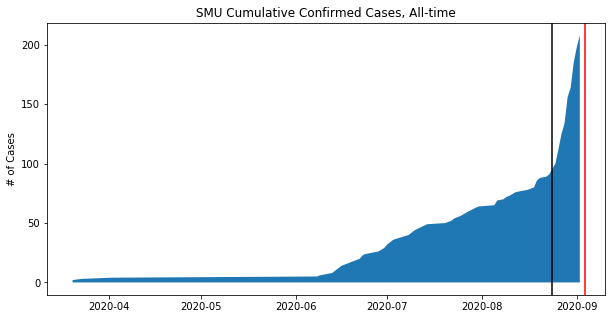

In [22]:
plt.figure(figsize=(10,5))
plt.fill_between(temp_smu_dates, np.cumsum(counts))
plt.title("SMU Cumulative Confirmed Cases, All-time")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.savefig("cumulative_cases_all_time.png")

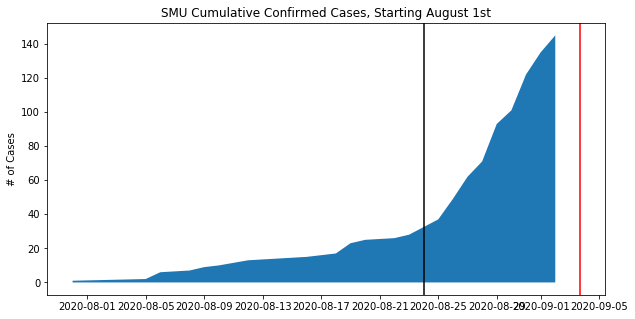

In [23]:
plt.figure(figsize=(10,5))
plt.fill_between(temp_smu_dates[28:], np.cumsum(counts[28:]))
plt.title("SMU Cumulative Confirmed Cases, Starting August 1st")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.savefig("cumulative_cases_starting_august.png")

In [24]:
# Save dataframe.
d = {'Date': temp_smu_dates, 'Cases Reported to SMU': counts, "Cumulative Cases": np.cumsum(counts) }
d = pd.DataFrame(data=d)
d.to_csv("cleaned_case_data.csv", index=False)

In [25]:
# Save dataframe.
d = {'Date': temp_smu_dates[29:], 'Cases Reported to SMU': counts[29:], "Cumulative Cases": np.cumsum(counts[29:]) }
d = pd.DataFrame(data=d)
d.to_csv("cleaned_case_data_starting_august.csv", index=False)

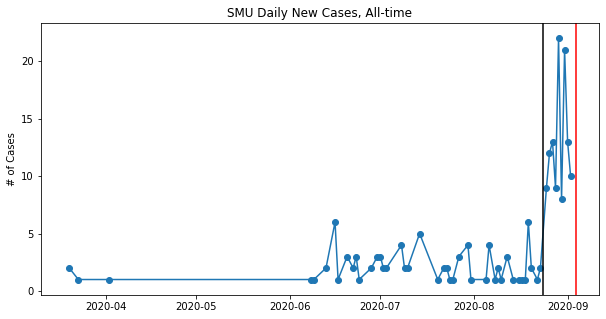

In [26]:
# Daily new cases.
plt.figure(figsize=(10,5))
plt.plot(temp_smu_dates, counts)
plt.scatter(temp_smu_dates, counts)
plt.title("SMU Daily New Cases, All-time")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.savefig("daily_new_cases_all_time.png")

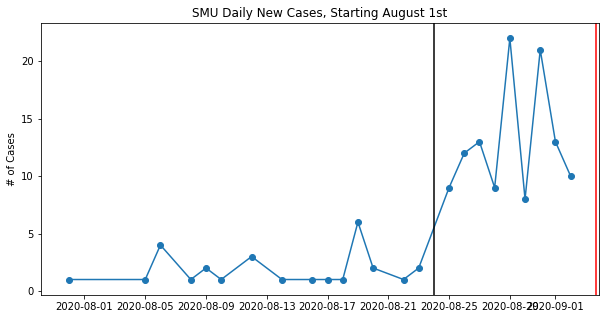

In [27]:
# Daily new cases.
plt.figure(figsize=(10,5))
plt.plot(temp_smu_dates[28:], counts[28:])
plt.scatter(temp_smu_dates[28:], counts[28:])
plt.title("SMU Daily New Cases, Starting August 1st")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.savefig("daily_new_cases_starting_august.png")

# On/off Campus.

In [28]:
df.head()

,Campus Community Notified,Date SMU was Notified of Positive Test,Last Known Date on Campus,Description,Active,Student,OnOffStudent
0,2020-08-28,2020-08-27,2020-08-24,A student who lives off campus,1,1,0
1,2020-08-28,2020-08-27,2020-08-27,A student who lives off campus,1,1,0
2,2020-08-28,2020-08-27,2020-08-27,A student who lives on campus,1,1,1
3,2020-08-28,2020-08-27,2020-08-27,A student who lives on campus,1,1,1
4,2020-08-28,2020-08-27,2020-08-27,A student who lives off campus,1,1,0


In [29]:
on_campus = df[df["OnOffStudent"] == 1]
off_campus = df[(df["Student"] == 1)&(df["OnOffStudent"] == 0)]

In [30]:
on_counts = np.zeros(len(temp_smu_dates))
off_counts = np.zeros(len(temp_smu_dates))
for i in range(len(temp_smu_dates)):
    on_sub_count = len(on_campus[on_campus["Date SMU was Notified of Positive Test"] == temp_smu_dates[i]])
    off_sub_count = len(off_campus[off_campus["Date SMU was Notified of Positive Test"] == temp_smu_dates[i]])
    on_counts[i] = on_sub_count
    off_counts[i] = off_sub_count 

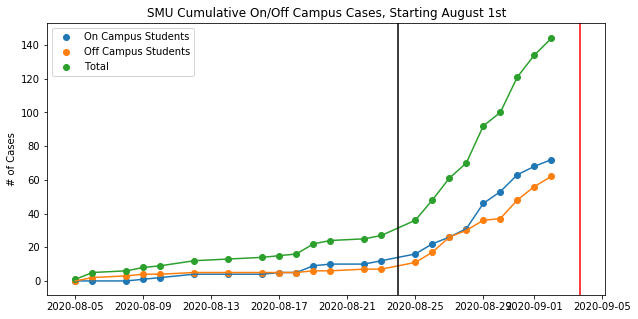

In [31]:
# Daily new cases.
plt.figure(figsize=(10,5))

plt.plot(temp_smu_dates[29:], np.cumsum(on_counts[29:]))
plt.scatter(temp_smu_dates[29:], np.cumsum(on_counts[29:]), label="On Campus Students")

plt.plot(temp_smu_dates[29:], np.cumsum(off_counts[29:]))
plt.scatter(temp_smu_dates[29:], np.cumsum(off_counts[29:]), label="Off Campus Students")

plt.plot(temp_smu_dates[29:], np.cumsum(counts[29:]))
plt.scatter(temp_smu_dates[29:], np.cumsum(counts[29:]), label="Total")

plt.title("SMU Cumulative On/Off Campus Cases, Starting August 1st")
plt.axvline(np.datetime64(dt.datetime.strptime("20-08-24", "%y-%m-%d")), ymin=0, c="k")
plt.axvline(np.datetime64(dt.datetime.now()), ymin=0, c="r")
plt.ylabel("# of Cases")
plt.legend()
plt.savefig("cumulative_on_off_cases_starting_august.png")

In [32]:
# Calculate number of on-campus infected students.
print(len(df[(df["Active"] == 1)&(df["OnOffStudent"] == 1)]))

62
